In [3]:
library("ggplot2")
library("dplyr")
library("ggpubr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
#read in the bone data and bony prominance distance data
bone_df = read.csv("summary_of_bone_volume.csv")
bony_prominance_distance_df = read.csv("bony_prominance_distance.csv")
head(bony_prominance_distance_df)

,SampleID,distance,group
,<chr>,<dbl>,<chr>
1,DW_1,4.627,Arthritic
2,DW_2,4.435,Arthritic
3,DW_3,4.493,Arthritic
4,DW_4,4.430,Arthritic
5,DW_5,4.512,Arthritic
6,DW_6,4.562,Arthritic


In [5]:
#make sure both are in the same order
bone_df$SampleID == bony_prominance_distance_df$SampleID

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [6]:
#make a data frame for the bone voume, bony prominance distance, the ratio, the sampleID and the
#class labels
num_samples = nrow(bone_df)
all_bone_and_prominance_distance_df = data.frame(matrix(data = 0,nrow = num_samples, ncol = 5))
colnames(all_bone_and_prominance_distance_df) = c("SampleID","average_bone_volume","prominance_distance","bone_to_distance_ratio","Class")
all_bone_and_prominance_distance_df$SampleID = bone_df$SampleID
all_bone_and_prominance_distance_df$average_bone_volume = bone_df$Average_volume
all_bone_and_prominance_distance_df$prominance_distance = bony_prominance_distance_df$distance
all_bone_and_prominance_distance_df$bone_to_distance_ratio = all_bone_and_prominance_distance_df$average_bone_volume / all_bone_and_prominance_distance_df$prominance_distance
all_bone_and_prominance_distance_df$Class = bone_df$Class
head(all_bone_and_prominance_distance_df)


,SampleID,average_bone_volume,prominance_distance,bone_to_distance_ratio,Class
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,DW_1,0.3376760,4.627,0.07297947,Arthritic
2,DW_2,0.3318490,4.435,0.07482503,Arthritic
3,DW_3,0.3355320,4.493,0.07467883,Arthritic
4,DW_4,0.3010500,4.430,0.06795711,Arthritic
5,DW_5,0.3482920,4.512,0.07719238,Arthritic
6,DW_6,0.4608835,4.562,0.10102663,Arthritic


In [7]:
#confirm t test
arthritic_df = data.frame(filter(all_bone_and_prominance_distance_df,all_bone_and_prominance_distance_df$Class == "Arthritic"))
non_arthritic_df = data.frame(filter(all_bone_and_prominance_distance_df,all_bone_and_prominance_distance_df$Class == "Non-Arthritic"))

In [8]:
t.test(arthritic_df$bone_to_distance_ratio,non_arthritic_df$bone_to_distance_ratio)


	Welch Two Sample t-test

data:  arthritic_df$bone_to_distance_ratio and non_arthritic_df$bone_to_distance_ratio
t = -2.4016, df = 7.8338, p-value = 0.0437
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0208910362 -0.0003854149
sample estimates:
 mean of x  mean of y 
0.07723106 0.08786929 


Warning message:
“The `fatten` argument of `geom_crossbar()` is deprecated as of ggplot2 4.0.0.
ℹ Please use the `middle.linewidth` argument instead.”


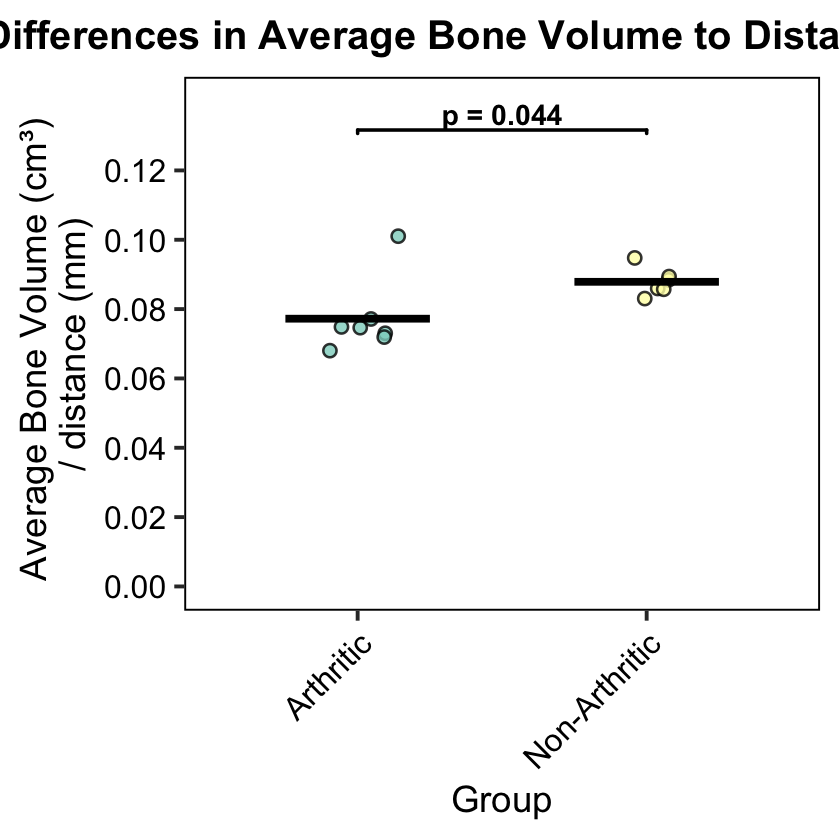

In [10]:
# Comparison groups
my_comparisons <- list(c("Arthritic", "Non-Arthritic"))

# create p-value text
pval_text <- sprintf("p = %.3f",
                     t.test(bone_to_distance_ratio ~ Class,
                            data = all_bone_and_prominance_distance_df)$p.value)

# Dot plot with numeric p-value and thick bracket
dot_plot2 <- ggplot(data = all_bone_and_prominance_distance_df,
                    aes(x = Class, y = bone_to_distance_ratio, fill = Class)) +
  
  geom_jitter(width = 0.15, size = 3, alpha = 0.8, shape = 21, color = "black") +
  
  stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", fatten = 2) +
  
  geom_signif(
    comparisons = my_comparisons,
    annotations = pval_text,
    y_position = 0.13,      # <-- MOVE BAR UP
    tip_length = 0.03,
    textsize = 6,
    size = 1,
    color = "black",
    fontface = "bold"
  ) +
  
  ylab("Average Bone Volume (cm³) \n/ distance (mm)") +
  xlab("Group") +
  ggtitle("Differences in Average Bone Volume to Distance Ratio") +
  scale_fill_brewer(palette = "Set3") +
  theme_bw(base_size = 24) +
  theme(
    axis.text.x = element_text(color = "black", angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black"),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA),
    legend.position = "none"
  ) +
  
  # expand y-limit to make room for the bar
  scale_y_continuous(limits = c(0, 0.14),
                     breaks = seq(0.00, 0.12, by = 0.02))

print(dot_plot2)

In [33]:
pdf(file = "Experiment_1_average_bone_volume_to_distance_ratio.pdf",   # The directory you want to save the file in
    width = 12, # The width of the plot in inches
    height = 12) # The height of the plot in inches
# Step 2: Create the plot with R code
print(dot_plot2)
# Step 3: Run dev.off() to create the file!
dev.off()

agg_record_634469414 
                   2

In [16]:
#save the data
write.csv(x = all_bone_and_prominance_distance_df,file = "all_bone_and_prominence_distances.csv", row.names = FALSE)